#### Introduction
Google Trends provides a unique insight into what people search for online, making it a valuable tool for analyzing public interest over time. This project leverages the `pytrends` API to extract, process, and visualize search trends for the keyword "Data Science". 

By analyzing search volume across time, regions, and related queries, we aim to identify key trends, patterns, and insights that can help businesses, researchers, and enthusiasts understand search behavior on a global scale.

#### Key Objectives:
- Retrieve historical search trends for "Data Science"  
- Analyze regional interest in the keyword  
- Compare search interest with other related topics  
- Visualize search patterns using Python and Matplotlib
- Provide actionable insights from Google Trends data  

This notebook guides you through data extraction, processing, and visualization to uncover valuable insights about how "Data Science" has trended worldwide. 

In [ ]:
import pandas as pd
from pytrends.request import TrendReq
import matplotlib.pyplot as plt
import time

#### Connecting to Google
Let’s get started with the task of analyzing the Google search trends by importing the required python libraries. First, we need to import pandas to create a dataframe. Second, we need to connect to Google as we are requesting the Google trending topics, so for this, we need to import the method TrendReq from pytrends.request library. Also, we will import matplotlib, to visualize the data.

In [5]:
Trending_topics = TrendReq(hl='en-US', tz=360)

#### Build Payload
We will be creating a dataframe of the top 10 countries that search for the term “Data Science“. For this, we will be using the method build_payload, which allows storing a list of keywords that you want to search. In this, you can also specify the timeframe and the category to query the data from. 

In [7]:
kw_list=["Data Science"]
Trending_topics.build_payload(kw_list,cat=0, timeframe='today 12-m')
time.sleep(5) # Wait for 5 seconds

#### Interest Over Time
The interest_over_time() method, returns the historical, indexed data for when the specified keyword was most searched according to the timeframe mentioned in the build payload method.

In [8]:
data = Trending_topics.interest_over_time()
data = data.sort_values(by="Data Science", ascending = False)
data = data.head(10)
print(data)

            Data Science  isPartial
date                               
2024-05-12           100      False
2025-01-19           100      False
2024-03-17            99      False
2024-11-17            98      False
2024-06-09            98      False
2024-08-18            98      False
2024-05-05            98      False
2024-05-26            97      False
2024-04-28            97      False
2024-02-11            97      False


Plotting a line chart to show the trend of the search term over time.

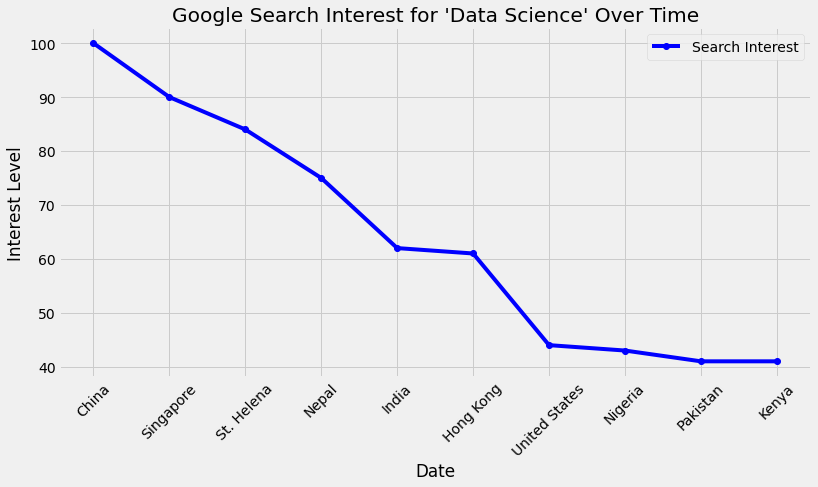

In [24]:
plt.figure(figsize=(12, 6))
plt.plot(data.index, data["Data Science"], marker="o", linestyle="-", color="b", label="Search Interest")
plt.xlabel("Date")
plt.ylabel("Interest Level")
plt.title("Google Search Interest for 'Data Science' Over Time")
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

#### Historical Hour Interest
The get_historical_interest() method returns the historical, indexed, hourly data for when the specified keyword was most searched. You can also mention various time period parameters for which you want the historical data such as year_start, month_start, day_start, hour_start, year_end, month_end, day_end, and hour_end. 

In [9]:
kw_list = ["Data Science"]
Trending_topics.build_payload(kw_list, cat=0, timeframe='2018-01-01 2018-02-01', geo='', gprop='')
data = Trending_topics.interest_over_time()
data = data.sort_values(by="Data Science", ascending = False)
data = data.head(10)
print(data)

            Data Science  isPartial
date                               
2018-01-30           100      False
2018-01-22            99      False
2018-01-23            96      False
2018-01-31            95      False
2018-01-24            94      False
2018-02-01            93      False
2018-01-29            93      False
2018-01-09            92      False
2018-01-17            91      False
2018-01-08            91      False


#### Interest By Region
Next is the interest_by_region method, this will let you know the performance of the keyword per region. It will show results on a scale of 0-100, where 100 indicates the country with the most search and 0 indicates with least search or not enough data. 

In [10]:
data = Trending_topics.interest_by_region()
data = data.sort_values(by="Data Science", ascending = False)
data = data.head(10)
print(data)

               Data Science
geoName                    
China                   100
Singapore                90
St. Helena               84
Nepal                    75
India                    62
Hong Kong                61
United States            44
Nigeria                  43
Pakistan                 41
Kenya                    41


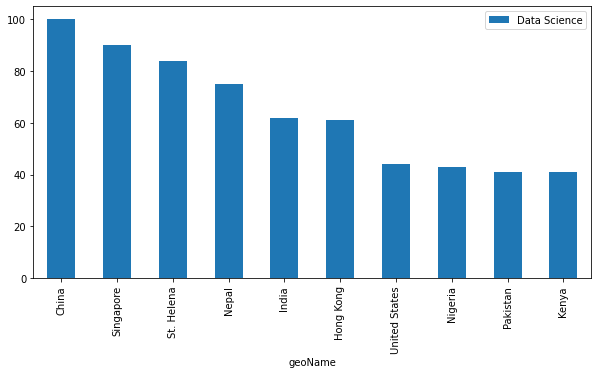

In [15]:
data.reset_index().plot(x='geoName', y='Data Science',
                        figsize=(10,5), kind="bar")
plt.style.use('fivethirtyeight')
plt.show()

A heatmap can be used to visually highlight the countries where "Data Science" is searched the most.

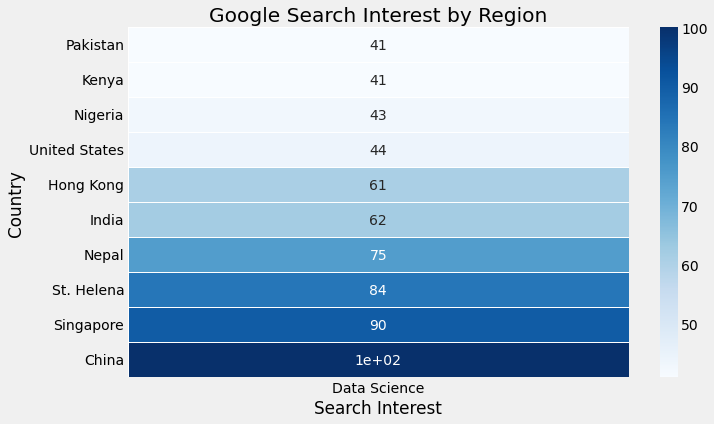

In [25]:
import seaborn as sns

plt.figure(figsize=(10, 6))
data_sorted = data.sort_values(by="Data Science", ascending=True)
sns.heatmap(data_sorted[["Data Science"]], cmap="Blues", annot=True, linewidths=0.5)
plt.title("Google Search Interest by Region")
plt.xlabel("Search Interest")
plt.ylabel("Country")
plt.show()


#### Top Charts
Using this method, we can get the top trending searches yearly. So, let us check what were the searches trending in the year 2020.

In [20]:
'''
df = Trending_topics.top_charts(2020, hl='en-US', 
                                tz=300, geo='GLOBAL')
df.head(10)
'''

"\ndf = Trending_topics.top_charts(2020, hl='en-US', \n                                tz=300, geo='GLOBAL')\ndf.head(10)\n"

In [17]:
try:
    Trending_topics.build_payload(kw_list=['Data Science'])
    related_queries = Trending_topics.related_queries()
    related_queries.values()
except (KeyError, IndexError):
    print("No related queries found for 'Data Science'")


No related queries found for 'Data Science'


In [19]:
keywords = Trending_topics.suggestions(
  keyword='Data Science')
df = pd.DataFrame(keywords)
df.drop(columns= 'mid') 

,title,type
0,Data science,Field of study
1,Master in Data Science,Topic
2,The Comfort Crisis: Embrace Discomfort To Recl...,Book by Michael Easter
3,Mathematics for Machine Learning,"Book by A. Aldo Faisal, Cheng Soon Ong, and Ma..."
4,Discrete Mathematics and Its Applications,Textbook by Kenneth H. Rosen


#### Comparing Multiple Keywords
I was curious about comparing multiple search terms (e.g., "Data Science" vs. "Machine Learning"), so we modify the payload and plot them together.

In [27]:
kw_list = ["Data Science", "Machine Learning"]
Trending_topics.build_payload(kw_list, cat=0, timeframe="today 12-m")
data_multi = Trending_topics.interest_over_time()

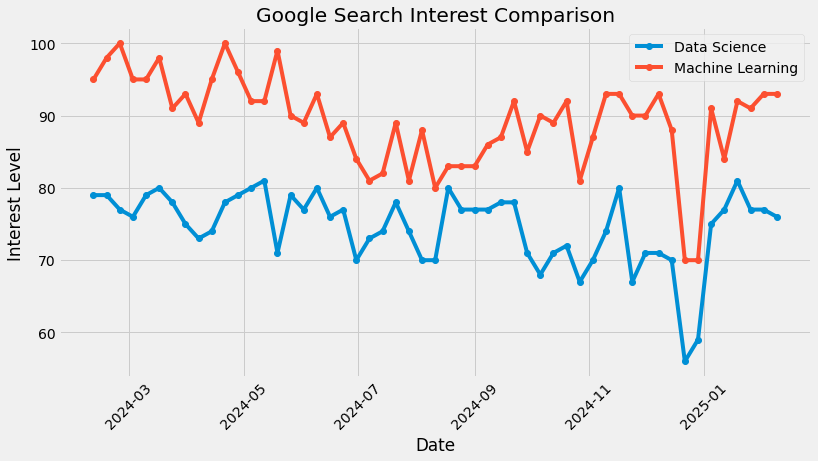

In [28]:
plt.figure(figsize=(12, 6))
for kw in kw_list:
    plt.plot(data_multi.index, data_multi[kw], marker="o", linestyle="-", label=kw)

plt.xlabel("Date")
plt.ylabel("Interest Level")
plt.title("Google Search Interest Comparison")
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

#### Conclusion
This analysis of Google Search Trends provides a data-driven perspective on the interest in "Data Science" over time and across different regions.

#### Key Findings:
- The search interest for "Data Science" fluctuates over time, showing seasonal peaks.  
- The highest search interest is observed in countries like China, Singapore, and India.  
- A comparison with related keywords (e.g., "Machine Learning") reveals shifts in technology trends.  
- Search trends offer valuable insights for market research, content strategy, and business decision-making.  

#### Future Scope:
Expand the analysis to include multiple technology-related keywords (e.g., "AI")